<a href="https://colab.research.google.com/github/KauaHenSilva/python_predict_MNIST/blob/main/main_cruzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [1]:
!pip install tensorflow==2.16.1 --quiet

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
tf.__version__

'2.16.1'

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as kr_utils
from sklearn.model_selection import StratifiedKFold

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

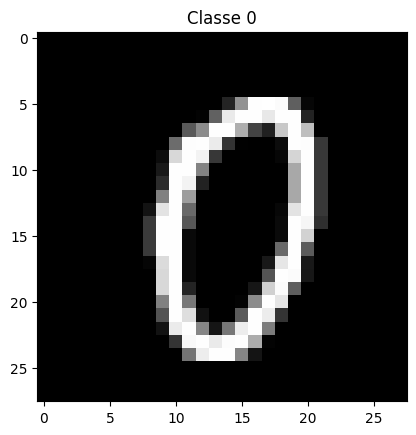

In [9]:
plt.imshow(x_train[1000], cmap='gray')
plt.title('Classe ' + str(y_train[1000]));

In [10]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
(x_train.shape, X_train.shape), (x_test.shape, X_test.shape)

(((60000, 28, 28), (60000, 28, 28, 1)), ((10000, 28, 28), (10000, 28, 28, 1)))

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train /= 255
X_test /= 255
(X_train.max(), X_test.max()),( X_train.min(), X_test.min())

((1.0, 1.0), (0.0, 0.0))

In [13]:
y_train = kr_utils.to_categorical(y_train, 10)
y_test = kr_utils.to_categorical(y_test, 10)

In [14]:
seed = 5
np.random.seed(seed)

In [17]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [22]:
def get_rede_neural():
  rede_neural = Sequential()
  rede_neural.add(InputLayer(shape=(28,28,1)))
  rede_neural.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
  rede_neural.add(MaxPooling2D(pool_size=(2,2)))
  rede_neural.add(Flatten())
  rede_neural.add(Dense(units=128, activation='relu'))
  rede_neural.add(Dense(units=10, activation='softmax'))
  rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return rede_neural

In [24]:
resultados = []
for index_train, index_test in kfold.split(x_train, np.zeros(shape=(y_train.shape[0], 1))):
  print("indices treinamento: ", index_train, "Ind test: ", index_test)
  rede_neural = get_rede_neural()
  rede_neural.fit(x_train[index_train], y_train[index_train], batch_size=128, epochs=5)
  precisao = rede_neural.evaluate(x_train[index_test], y_train[index_test])
  resultados.append(precisao[1])

indices treinamento:  [    0     1     2 ... 59997 59998 59999] Ind test:  [    5     7    10 ... 59983 59985 59993]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8035 - loss: 6.1885
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9631 - loss: 0.1433
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9761 - loss: 0.0810
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0531
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9865 - loss: 0.0419
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.1454
indices treinamento:  [    1     2     5 ... 59995 59996 59999] Ind test:  [    0     3     4 ... 59989 59997 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8087 - loss: 4.1740
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9611 - loss: 0.1403
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0848
Epoch 4/5
3

In [25]:
resultados

[0.9707499742507935,
 0.9701666831970215,
 0.9754166603088379,
 0.9714999794960022,
 0.9738333225250244]

In [26]:
np.array(resultados).mean(), np.array(resultados).std()

(0.9723333239555358, 0.001982561485970139)